# FEATURE SELECTION SHOULD BE DONE ONLY AFTER TRAIN TEST SPLIT TO AVOID OVERFITTING

if feature has high value it means its dependency on independent variable is very high

# Feature Selection- Dropping constant features
In this step we will be removing the features which have constant features which are actually not important for solving the problem statement

In [1]:
# Import pandas to create DataFrame 
import pandas as pd 
  
# Make DataFrame of the given data 
data = pd.DataFrame({"A":[1,2,4,1,2,4], 
                    "B":[4,5,6,7,8,9], 
                    "C":[0,0,0,0,0,0],
                    "D":[1,1,1,1,1,1]})

In [2]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1


Variance Threshold
Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [4]:
# HERE LOW VARIENCE MEANS data are not varying and almost same.
# example a col has 100 rows with, 96 value as 1, ans rest 4 values as 4
# that means machine is not learning from it as it has same trype of data..therfroe this kind of col has less varince
# for removing this we use LOW VARIENCE METHOD

In [6]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)   # varince zero means all data is same no variation ( c& d has zero varince)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [7]:
var_thres.get_support() # false, false for two columns c&d

array([ True,  True, False, False])

In [8]:
data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [9]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]   # other than col A and B remove the rest

print(len(constant_columns))

2


In [10]:
for feature in constant_columns:
     print(feature)

C
D


In [12]:
data.drop(constant_columns,axis=1)  # drop by default has axis=0 that is row, therefore axis=1 is column

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


# Lets practise on bigger dataset

# 2. Feature Selection- With Correlation
In this step we will be removing the features which are highly correlatedd 
Here also feature selection is not related to target, it is within independent features

In [13]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#Loading the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

In [15]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
#if a indepdendent feature is highly correlaated with the depandendt feature we dare not remove it
# but if some independent feature is highly correlated with each other, then we can remove all and keep one of them
# as all having highly correlated give same importance therefore why carry all 3 if one is enough

In [19]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [20]:
X = df.drop("MEDV",axis=1)   #Feature Matrix
y = df["MEDV"]

In [21]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
X.head()  # target variable MEDV is removed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [24]:
# note we are going to do feature selection only on train data,
# in test data we will directly remove that col which we removed in train as we dont need to do train method again in test

In [25]:
X_train.corr()# peason correlation range btw -1 to 1, 1=highly correlated

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


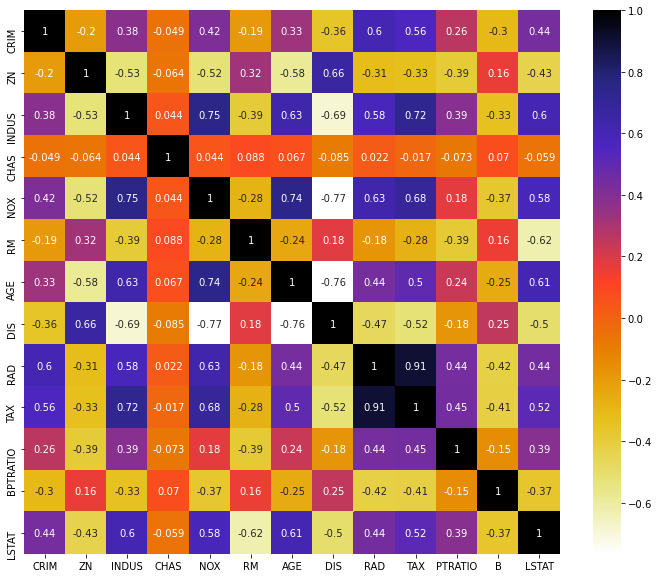

In [26]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [34]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns # as set eliminate dublicates
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value  # it convert negatve correlation into positive
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

# negative coreelated features has some intuition therefore we wont remove it

In [27]:
# here we relate each feature with all the feature once and calculate the correlation
# threshold is defined by as, which is 85% in general use

In [38]:
corr_features = correlation(X_train, 0.7)# 80% is threshold
len(set(corr_features))

4

In [39]:
corr_features  # if we see heat map tax and rad is higly correlated therefore we used RAD and remove Tax

{'AGE', 'DIS', 'NOX', 'TAX'}

In [40]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)  # directly applying on test data

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4.0,18.4,396.90,4.54


# Feature Selection-Information gain - mutual information In Classification Problem Statements
Mutual Information
MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.


In [41]:
import pandas as pd

In [42]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()
# we used this dataset as it has lot number of columns

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [44]:

### Train test split to avoid overfitting
### if we take the whole dataset and find its information gain it will lead to overfitting
### as it will know all the info and when tested with test data which has col of same dataset it will already know about it
### and when any new data will come it leads to overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),
    df['Wine'],
    test_size=0.3,
    random_state=0)

In [45]:
from sklearn.feature_selection import mutual_info_classif   # mutual_info is used to calculate the mutual info between target and indepedent feature
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info
## all value will be greater than 0 and max to 1. closer the value to 1 better is the accuracy

array([0.42462211, 0.31566244, 0.16586778, 0.30237862, 0.19691725,
       0.46164482, 0.7211581 , 0.07451207, 0.26532789, 0.61811483,
       0.53573911, 0.54968228, 0.52403696])

In [47]:
# higher thee value, higher is the importance of feature and it s most dependent on dependent variable

In [48]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.721158
Color.int               0.618115
OD                      0.549682
Hue                     0.535739
Proline                 0.524037
Phenols                 0.461645
Alcohol                 0.424622
Malic.acid              0.315662
Acl                     0.302379
Proanth                 0.265328
Mg                      0.196917
Ash                     0.165868
Nonflavanoid.phenols    0.074512
dtype: float64

<AxesSubplot:>

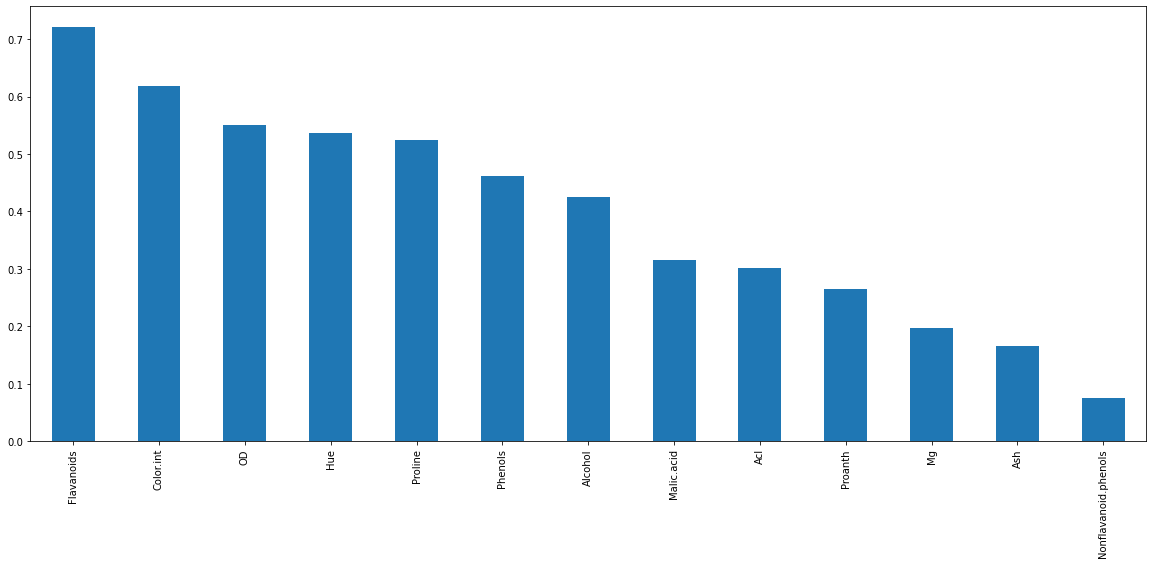

In [49]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [50]:
from sklearn.feature_selection import SelectKBest

In [51]:
from sklearn.feature_selection import SelectKBest

In [53]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)  # taking top 5 imp feature
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.



# Feature Selection-Information gain - mutual information In Regression Problem Statements
Mutual Information
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

MUTUAL INFORMATION MAINLY WORKS WIH INFORMATION GAIN/ENTROPY. 
THESE TERMS WE HAVE SEEN IN DECISION TREES.

In [1]:

#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
import pandas as pd
housing_df=pd.read_csv('house_train.csv')

In [2]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)

In [6]:
numerical_cols
# here we are taking numerical values as feeature selection is done only when we do all festure enginerrin
# and after train-test split we do feature scaling

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [7]:
housing_df=housing_df[numerical_cols]

In [8]:
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
housing_df=housing_df.drop("Id",axis=1)

In [11]:
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=['SalePrice'], axis=1),
    housing_df['SalePrice'],
    test_size=0.3,
    random_state=0)

In [12]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.0,9430,8,5,1999,1999,673.0,1163,0,...,856,0,128,0,0,180,0,0,7,2009
835,20,60.0,9600,4,7,1950,1995,0.0,442,0,...,436,290,0,0,0,0,0,0,2,2010
1216,90,68.0,8930,6,5,1978,1978,0.0,0,0,...,539,0,0,0,0,0,0,0,4,2010
559,120,NaN,3196,7,5,2003,2004,18.0,0,0,...,420,143,20,0,0,0,0,0,10,2006


In [13]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [15]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.24775385, 0.21980145, 0.16314972, 0.5317599 , 0.11298956,
       0.34624284, 0.2461567 , 0.09548211, 0.15969107, 0.        ,
       0.10902071, 0.38532331, 0.30955255, 0.2220595 , 0.        ,
       0.48259822, 0.0238929 , 0.        , 0.28469964, 0.07771699,
       0.03696491, 0.02299579, 0.18143238, 0.17796781, 0.26458218,
       0.38431828, 0.36466796, 0.06421173, 0.17969176, 0.01245541,
       0.00533494, 0.01864819, 0.        , 0.        , 0.        ,
       0.00159847])

In [16]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.531760
GrLivArea        0.482598
TotalBsmtSF      0.385323
GarageCars       0.384318
GarageArea       0.364668
YearBuilt        0.346243
1stFlrSF         0.309553
FullBath         0.284700
GarageYrBlt      0.264582
MSSubClass       0.247754
YearRemodAdd     0.246157
2ndFlrSF         0.222060
LotFrontage      0.219801
TotRmsAbvGrd     0.181432
OpenPorchSF      0.179692
Fireplaces       0.177968
LotArea          0.163150
BsmtFinSF1       0.159691
OverallCond      0.112990
BsmtUnfSF        0.109021
MasVnrArea       0.095482
HalfBath         0.077717
WoodDeckSF       0.064212
BedroomAbvGr     0.036965
BsmtFullBath     0.023893
KitchenAbvGr     0.022996
ScreenPorch      0.018648
EnclosedPorch    0.012455
3SsnPorch        0.005335
YrSold           0.001598
BsmtFinSF2       0.000000
LowQualFinSF     0.000000
MoSold           0.000000
PoolArea         0.000000
MiscVal          0.000000
BsmtHalfBath     0.000000
dtype: float64

<AxesSubplot:>

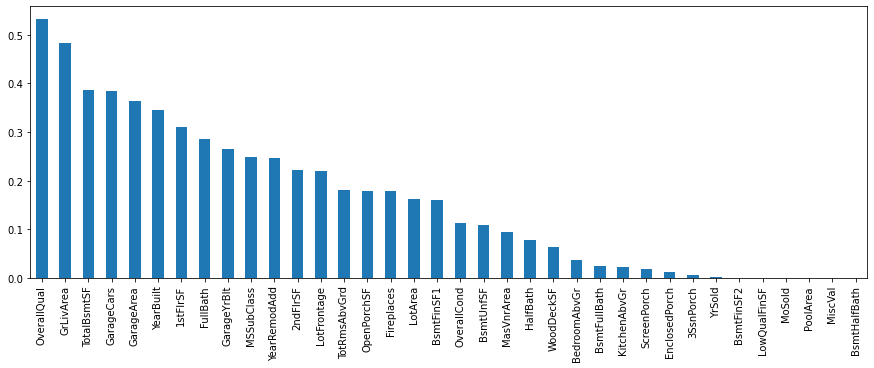

In [17]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))


In [18]:
from sklearn.feature_selection import SelectPercentile

In [19]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000000000AB7CAF0>)

In [20]:
selected_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [21]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

# Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

# Fisher Score- Chisquare Test For Feature Selection

Compute chi-squared stats between each non-negative feature and class.

This score should be used to evaluate categorical variables in a classification task.
This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [22]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [23]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [25]:

##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [26]:
# before we apply chi square test we have to do label encoding on features

In [28]:
import numpy as np
df['sex']=np.where(df['sex']=="male",1,0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [29]:
### Let's perform label encoding on sex column
import numpy as np
### let's perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

In [30]:
### let's perform label encoding on alone
df['alone']=np.where(df['alone']==True,1,0)

In [31]:
### train Test split is usually done to avaoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],df['survived'],test_size=0.3,random_state=100)

In [32]:
X_train.head()


,sex,embarked,alone,pclass
69,1,0,0,3
85,0,0,0,3
794,1,0,1,3
161,0,0,1,2
815,1,0,1,1


In [33]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [34]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [35]:
f_p_values   #first array is f score, 2nd array is p value= lesser the p value best is the features

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [38]:
 
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

sex         5.306038e-16
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64

In [39]:
p_values.sort_index(ascending=False)

sex         5.306038e-16
pclass      2.755149e-06
embarked    5.999221e-03
alone       9.696105e-04
dtype: float64

Sex Column is the most important column when compared to the output feature Survived